# Анализ бизнес-показателей развлекательного приложения Procrastinate Pro+

Несмотря на огромные вложения в рекламу, последние несколько месяцев компания терпит убытки. Задача — разобраться в причинах и помочь компании выйти в плюс.

Есть данные о пользователях, привлечённых с 1 мая по 27 октября 2019 года:  
- лог сервера с данными об их посещениях,
- выгрузка их покупок за этот период,
- рекламные расходы.  

Нам предстоит изучить:  
- откуда приходят пользователи и какими устройствами они пользуются,
- сколько стоит привлечение пользователей из различных рекламных каналов;
- сколько денег приносит каждый клиент,
- когда расходы на привлечение клиента окупаются,
- какие факторы мешают привлечению клиентов.

Данные получены от ***Яндекс.Практикум***. Дата проведения анализа 30.01.2022

# Оглавление

<a id='content'></a>
**[Шаг 1. Загрузим данные и подготовим их к анализу](#part_1)**  
* [Положим данные о визитах, заказах и рекламных тратах в переменные](#part_1.1) 
* [Подготовим данные к анализу. Убедимся, что тип данных во всех колонках соответствует значениям. Проверим отсутствие дубликатов.](#part_1.2) 
* [Вывод](#part_1.3)  

**[Шаг 2. Проведем исследовательский анализ данных](#part_2)**  
* [Создадим пользовательские профили. Определим минимальную и максимальную даты привлечения пользователей](#part_2.1)
* [Выясним, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей](#part_2.2)
* [Какими устройствами пользуются клиенты, и какие устройства предпочитают платящие пользователи](#part_2.3)
* [Изучим рекламные источники привлечения и определим каналы, из которых пришло больше всего платящих пользователей](#part_2.4)
* [Вывод](#part_2.5) 

**[Шаг 3. Построим отчёты и посчитаем метрики](#part_3)**  
* [Сколько людей пользуются приложением в день, неделю и месяц: рассчитаем DAU, WAU и MAU](#part_3.1)
* [Посмотрим на число пользовательских сессий](#part_3.2)
* [Посмотрим сколько длится одна сессия](#part_3.3)
* [Сколько времени в среднем проходит с момента первого посещения до покупки](#part_3.4)
* [Рассчитаем среднее число покупок на одного покупателя за день, неделю и месяц](#part_3.5)
* [Посчитаем средний чек за день, неделю и месяц](#part_3.6)
* [Вывод](#part_3.7) 

**[Шаг 4. Маркетинг](#part_4)**
* [Рассчитаем общую сумму расходов на маркетинг](#part_4.1)
* [Сколько в среднем стоило привлечение одного пользователя из каждого источника](#part_4.2)
* [Вывод](#part_4.3)

**[Шаг 5. Зададим функции для расчета и анализа LTV, ROI, удержания и конверсии](#part_5)**  

**[Шаг 6. Оценим окупаемость рекламы для привлечения пользователей](#part_6)**  
* [Проанализируем общую окупаемость рекламы](#part_6.1)  
* [Проанализируем окупаемость рекламы с разбивкой по устройствам](#part_6.2)  
* [Проанализируем окупаемость рекламы с разбивкой по странам](#part_6.3)  
* [Проанализируем окупаемость рекламы с разбивкой по рекламным каналам](#part_6.4)  
* [Вывод](#part_6.5) 

**[Шаг 7. Общий вывод](#part_7)**  
* [Причины неэффективности привлечения пользователей](#part_7.1)
* [Рекомендации для отдела маркетинга для повышения эффективности](#part_7.2)

<a id='part_1'></a>
# Шаг 1. Загрузим данные и подготовим их к анализу
[*Назад к оглавлению*](#content)

Загрузим данные о визитах, заказах и расходах в переменные. Оптимизируем данные для анализа. Убедимся, что тип данных в каждой колонке — правильный. Путь к файлам:

 -   /datasets/visits_info_short.csv. 
 -   /datasets/orders_info_short.csv. 
 -   /datasets/costs_info_short.csv.

<a id='part_1.1'></a>
**Положим данные о визитах, заказах и рекламных тратах в переменные.**  
[*Назад к оглавлению*](#content)

In [1]:
# импорт библиотек
import pandas as pd
import numpy as np
from datetime import date, datetime, timedelta
from matplotlib import pyplot as plt
import seaborn as sns
import datetime
import math

In [2]:
# загрузка данных
temp_1 = '/datasets/visits_info_short.csv'
temp_2 = '/datasets/orders_info_short.csv'
temp_3 = '/datasets/costs_info_short.csv'
visits, orders, costs = (
    pd.read_csv(temp_1),
    pd.read_csv(temp_2),
    pd.read_csv(temp_3)
)

В вашем распоряжении три датасета.  
Файл ***visits_info_short.csv*** хранит лог сервера с информацией о посещениях сайта, ***orders_info_short.csv*** — информацию о покупках, а ***costs_info_short.csv*** — информацию о расходах на рекламу.

<a id='part_1.2'></a>
**Подготовим данные к анализу. Убедимся, что тип данных во всех колонках соответствует значениям. Проверим отсутствие дубликатов.**  
[*Назад к оглавлению*](#content)

In [3]:
# посмотрим общую информацию
visits.info(), orders.info(), costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
User Id          309901 non-null int64
Region           309901 non-null object
Device           309901 non-null object
Channel          309901 non-null object
Session Start    309901 non-null object
Session End      309901 non-null object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
User Id     40212 non-null int64
Event Dt    40212 non-null object
Revenue     40212 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
dt         1800 non-null object
Channel    1800 non-null object
costs      1800 non-null float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


(None, None, None)

Пустых строк таблицах нет

In [4]:
# выведим таблицы
display(visits.head(), orders.head(), costs.head())

,User Id,Region,Device,Channel,Session Start,Session End
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40


,User Id,Event Dt,Revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99


,dt,Channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1


Для удоства переименуем названия столбцов

In [5]:
visits.columns = [x.lower().replace(' ', '_') for x in visits.columns.values]
orders.columns = [x.lower().replace(' ', '_') for x in orders.columns.values]
costs.columns = [x.lower().replace(' ', '_') for x in costs.columns.values]

Даты в датафреймах в виде строк, переведем их в формат дат.

In [6]:
# заменим тип на даты
visits['session_start'] = pd.to_datetime(visits['session_start'])
visits['session_end'] = pd.to_datetime(visits['session_end'])
orders['event_dt'] = pd.to_datetime(orders['event_dt'])
costs['dt'] = pd.to_datetime(costs['dt'], format="%Y-%m-%d")

Посмотрим на уникальные значения в столбцах ***'region'***, ***'device'***, ***'channel'***, датафрейма **visits** и **costs**

In [7]:
# выведим уникальные значения
display(
    visits['region'].unique(),
    visits['device'].unique(),
    visits['channel'].unique(),
    costs['channel'].unique()
)

array(['United States', 'UK', 'France', 'Germany'], dtype=object)

array(['iPhone', 'Mac', 'Android', 'PC'], dtype=object)

array(['organic', 'TipTop', 'RocketSuperAds', 'YRabbit', 'FaceBoom',
       'MediaTornado', 'AdNonSense', 'LeapBob', 'WahooNetBanner',
       'OppleCreativeMedia', 'lambdaMediaAds'], dtype=object)

array(['FaceBoom', 'MediaTornado', 'RocketSuperAds', 'TipTop', 'YRabbit',
       'AdNonSense', 'LeapBob', 'OppleCreativeMedia', 'WahooNetBanner',
       'lambdaMediaAds'], dtype=object)

В анализе учавствует 4 страны США, Великобритания, Франция, Германия. Пользователи заходили с телефонов(iPhone, Android) и ПК(PC, Mac).

Проверим дублируются ли строки в датафроймах

In [8]:
# применим метод duplicated на проверку дублирующих строк
print(
    visits.duplicated().sum(),
    orders.duplicated().sum(),
    costs.duplicated().sum()
)

0 0 0


Дублирующих строк нет

In [9]:
print('Всего записей из логов сервера с данными об их посещениях - {} из них {} уникальных пользователей'
      .format(visits['user_id'].agg(['count', 'nunique'])[0]
              , visits['user_id'].agg(['count', 'nunique'])[1])
     )

Всего записей из логов сервера с данными об их посещениях - 309901 из них 150008 уникальных пользователей


In [10]:
visits['device'].value_counts()

iPhone     112603
Android     72590
PC          62686
Mac         62022
Name: device, dtype: int64

Больше всего пользователей заходили через iPhone 112603 пользователей.

In [11]:
print('Из выгрузки покупок за период, всего заказов {} из них {} покупателей'
      .format(orders['user_id'].agg(['count', 'nunique'])[0]
             , orders['user_id'].agg(['count', 'nunique'])[1])
     )

Из выгрузки покупок за период, всего заказов 40212 из них 8881 покупателей


In [12]:
orders['revenue'].describe()

count    40212.000000
mean         5.370608
std          3.454208
min          4.990000
25%          4.990000
50%          4.990000
75%          4.990000
max         49.990000
Name: revenue, dtype: float64

В среднем заказ совершается на сумму 5.37 у.е.  
Медиана и среднее довольно близко расположены, можно предположить, что сильных выбрососв в данных нет. Также видим, что 1, 2, 3 и 4 квантили - все они равны 4.99. Можно предположить, что это стоимость подписки.

In [13]:
print('По данным из таблицы по рекламным расходам всего записей {} из них {} дат'
      .format(costs['dt'].agg(['count', 'nunique'])[0]
             , costs['dt'].agg(['count', 'nunique'])[1])
     )

По данным из таблицы по рекламным расходам всего записей 1800 из них 180 дат


In [14]:
costs['costs'].describe()

count    1800.000000
mean       58.609611
std       107.740223
min         0.800000
25%         6.495000
50%        12.285000
75%        33.600000
max       630.000000
Name: costs, dtype: float64

Затраты на маркетинг по средней и медиане сильно разнятся 58,6 у.е. и 12,2 у.е. выходит суммы на какие то каналы привлечения клиентов уходят больше, на какие то меньше. Максимальная тарта на маретинг 630 у.е., минимальная 0,8 у.е.

<a id='part_1.3'></a>
**Вывод**  
[*Назад к оглавлению*](#content)

В вашем распоряжении три датасета. Файл ***visits_info_short.csv*** хранит лог сервера с информацией о посещениях сайта, ***orders_info_short.csv*** — информацию о покупках, а ***costs_info_short.csv*** — информацию о расходах на рекламу.  

Структура ***visits_info_short.csv***  
* `User Id` — уникальный идентификатор пользователя;
* `Region` — страна пользователя;
* `Device` — тип устройства пользователя;
* `Channel` — идентификатор источника перехода;
* `Session Start` — дата и время начала сессии;
* `Session End` — дата и время окончания сессии.

Структура ***orders_info_short.csv***  
* `User Id` — уникальный идентификатор пользователя;
* `Event Dt` — дата и время покупки;
* `Revenue` — сумма заказа.

Структура ***costs_info_short.csv***  
* `Channel` — идентификатор рекламного источника;
* `Dt` — дата проведения рекламной кампании;
* `Costs` — расходы на эту кампанию.

Подготовили данные к анализу и загрузили данные в переменные. Проверили данные на дубликаты и по датам скоретировали тип на *date*, по остальным столбцам тип верный.

Уникальных пользователей у нас 150008, всего 309901. Данные о пользователях из 4х стран - США, Великобритания, Франции, Германии. Среди данных об устройствах в логах представлены iPhone, Android, PC, Mac. Больше всего в логах пользователей iPhone 112603.

Всего заказов было 40212, среди них покупателей 8881. В среднем каждый заказ совершается на сумму 5.37 у.е. Медиана и среднее довольно близко расположены, можно предположить, что сильных выбрососв в данных нет. Также видим, что 1, 2, 3 и 4 квантили - все они равны 4.99. Можно предположить, что это стоимость подписки.

Всего 1800 строк с данными о затратах на маркетинг. Из них 180 уникальных строк с датами, то есть, в логах собраны данные за 180 дней. В выгрузке представлены данные по закупкам в 10 каналах - 'FaceBoom', 'MediaTornado', 'RocketSuperAds', 'TipTop', 'YRabbit', 'AdNonSense', 'LeapBob', 'OppleCreativeMedia', 'WahooNetBanner', 'lambdaMediaAds' Затраты на маркетинг по средней и медиане сильно разнятся 58,6 у.е. и 12,2 у.е. выходит суммы на какие то каналы привлечения клиентов уходят больше, на какие то меньше. Максимальная тарта на маретинг 630 у.е., минимальная 0,8 у.е.

<a id='part_2'></a>
# Шаг 2. Проведем исследовательский анализ данных
[*Назад к оглавлению*](#content)

<a id='part_2.1'></a>
**Создадим пользовательские профили. Определим минимальную и максимальную даты привлечения пользователей**  
[*Назад к оглавлению*](#content)

In [15]:
# создадим функцию для создания пользовательских профилей

def get_profiles(sessions, orders, ad_costs):

    # сортируем сессии по ID пользователя и дате посещения
    # группируем по ID и находим первые значения session_start и channel
    # столбец с временем первого посещения назовём first_ts
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['dt'] = pd.to_datetime(profiles['dt'], format="%Y-%m-%d")
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())


    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )

    # объединяем траты на рекламу и число привлечённых пользователей
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles

Вызовем функцию get_profiles(), передав ей данные о посещениях, покупках и тратах на рекламу.

In [16]:
# получим профили пользователей
profiles = get_profiles(visits, orders, costs)
display(profiles.head(5))

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.088172
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-01,False,1.107237
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,2019-10-01,False,0.000000
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-01,False,0.988235
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-01,False,0.230769


Получили профили пользователей.  
Определим минимальную и максимальную даты привлечения пользователей.

In [17]:
# доступный интервал привлечения пользователей
min_analysis_date = profiles['dt'].min()
observation_date = profiles['dt'].max()

print(min_analysis_date,'\n', observation_date)

2019-05-01 00:00:00 
 2019-10-27 00:00:00


Минимальная дата привлечения пользователей 01/05/2019.  
Максимальная дата привлечения пользователей 27/10/2019.

<a id='part_2.2'></a>
**Выясним, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей.**  
[*Назад к оглавлению*](#content)

Построим таблицу, отражающую количество пользователей и их долю из каждой страны.

In [18]:
region_share = pd.DataFrame()
region_share['users_cnt'] = profiles.groupby('region')['user_id'].count()
region_share['share'] = ((region_share['users_cnt'] / profiles['region'].count()) * 100)
region_share.sort_values(by='share', ascending=False).style.format({'share': '{:.2f}%'})

,users_cnt,share
region,,
United States,100002,66.66%
UK,17575,11.72%
France,17450,11.63%
Germany,14981,9.99%


Основные пользователи находяться в США 67%. В Великобритании и во Франции примерно равные доил пользователей 12%. Меньше всего в Германии 10%

Посмотрим на платящих пользователей и долю платящих из каждой страны.

In [19]:
region_payer_share = pd.DataFrame()
region_payer_share['users_cnt'] = profiles.query('payer == True').groupby('region')['user_id'].count()
region_payer_share['share'] = (
    (region_payer_share['users_cnt'] 
    / profiles.query('payer == True')['region'].count()) * 100
)
region_payer_share.sort_values(by='share', ascending=False).style.format({'share': '{:.2f}%'})

,users_cnt,share
region,,
United States,6902,77.72%
UK,700,7.88%
France,663,7.47%
Germany,616,6.94%


США опять лидирует, 78% платящих пользователей. В Великобритании 8%, Франция и Германия меньше всего около 7% платящих пользователей

Рассчитаем долю платящих пользователей отдельно по странам

In [20]:
# Создадим функцию, т.к. не раз еще будем использовать
def pivot_share_result(column, df):
    result = pd.DataFrame()
    result['users_cnt'] = df.groupby(column)['user_id'].count()
    result['users_share'] = ((result['users_cnt'] / df[column].count()) * 100)
    result['payer_users_cnt'] = df.query('payer == True').groupby(column)['user_id'].count()
    result['payer_share'] = ((result['payer_users_cnt'] / result['users_cnt']) * 100)
    return result.sort_values(by='users_share', ascending=False).style.format({'users_share': '{:.2f}%', 'payer_share': '{:.2f}%'})

In [21]:
pivot_share_result('region', profiles)

,users_cnt,users_share,payer_users_cnt,payer_share
region,,,,
United States,100002,66.66%,6902,6.90%
UK,17575,11.72%,700,3.98%
France,17450,11.63%,663,3.80%
Germany,14981,9.99%,616,4.11%


Платящий пользователей, от всех пользователей, как показывает таблица не так много. США 7%, Великобртании, Франции и Германии по 4%

<a id='part_2.3'></a>
**Какими устройствами пользуются клиенты, и какие устройства предпочитают платящие пользователи.**  
[*Назад к оглавлению*](#content)

In [22]:
device_share = pd.DataFrame()
device_share['users_cnt'] = profiles.groupby('device')['user_id'].count()
device_share['share'] = ((device_share['users_cnt'] / profiles['device'].count()) * 100)
device_share.sort_values(by='share', ascending=False).style.format({'share': '{:.2f}%'})

,users_cnt,share
device,,
iPhone,54479,36.32%
Android,35032,23.35%
PC,30455,20.30%
Mac,30042,20.03%


Вперед вырвались владельцы IPhone 36%, далее владельцы Android 23%, доли PC и Mac практически одинаковы по 20%.

Изучим распределение для платящих пользователей.

In [23]:
device_payer_share = pd.DataFrame()
device_payer_share['users_cnt'] = profiles.query('payer == True').groupby('device')['user_id'].count()
device_payer_share['share'] = (
    (device_payer_share['users_cnt'] 
     / profiles.query('payer == True')['device'].count()) * 100
)
device_payer_share.sort_values(by='share', ascending=False).style.format({'share': '{:.2f}%'})

,users_cnt,share
device,,
iPhone,3382,38.08%
Android,2050,23.08%
Mac,1912,21.53%
PC,1537,17.31%


Видим, что картинка примерна такая же. Основная доля платящих пользователей - это владельцы IPhone 38%. Далее идут владельцы Android 23%, Mac 21% и PC 17%.

Рассчитаем долю платящих пользователей отдельно по устройствам.

In [24]:
pivot_share_result('device', profiles)

,users_cnt,users_share,payer_users_cnt,payer_share
device,,,,
iPhone,54479,36.32%,3382,6.21%
Android,35032,23.35%,2050,5.85%
PC,30455,20.30%,1537,5.05%
Mac,30042,20.03%,1912,6.36%


Больше всего доля платящих пользователей для устройства Mac, 6.36% платят за продукт. Среди пользователей iPhone доля платящих равна 6.21%. Для пользователей Android она составляет 5.85%. Среди пользователей PC платящих меньше всего - 5.05%.

<a id='part_2.4'></a>
**Изучим рекламные источники привлечения и определим каналы, из которых пришло больше всего платящих пользователей.**  
[*Назад к оглавлению*](#content)

In [25]:
channel_share = pd.DataFrame()
channel_share['users_cnt'] = profiles.groupby('channel')['user_id'].count()
channel_share['share'] = ((channel_share['users_cnt'] / profiles['channel'].count()) * 100)

channel_share['payer_users_cnt'] = (
    profiles.query('payer == True')
    .groupby('channel')['user_id'].count()
)
channel_share['payer_share'] = (
    (channel_share['payer_users_cnt'] 
     / profiles.query('payer == True')['channel'].count()) * 100
)

channel_share.sort_values(by='share', ascending=False).style.format({'share': '{:.2f}%', 'payer_share': '{:.2f}%'})

,users_cnt,share,payer_users_cnt,payer_share
channel,,,,
organic,56439,37.62%,1160,13.06%
FaceBoom,29144,19.43%,3557,40.05%
TipTop,19561,13.04%,1878,21.15%
OppleCreativeMedia,8605,5.74%,233,2.62%
LeapBob,8553,5.70%,262,2.95%
WahooNetBanner,8553,5.70%,453,5.10%
RocketSuperAds,4448,2.97%,352,3.96%
MediaTornado,4364,2.91%,156,1.76%
YRabbit,4312,2.87%,165,1.86%


По источникам привлечения для всех пользователей (и платящих, и неплатящих), можно заметить, что больше всего приходится на органический трафик 38%, далее источники FaceBoom 19% и TipTop 13%.

Для платящего сегмента пользователей картина несколько иная. Большинство платящих пользователей пришли через канал FaceBoom 40%, 21% из TipTop и только 13% - из органического трафика.
По остальным каналам распределение равномерное в районе 3-5%.  
Самый непопулярный канал для всех сегментов пользователей - это lambdaMediaAds, для платящих - MediaTornado.

In [26]:
pivot_share_result('channel', profiles)

,users_cnt,users_share,payer_users_cnt,payer_share
channel,,,,
organic,56439,37.62%,1160,2.06%
FaceBoom,29144,19.43%,3557,12.20%
TipTop,19561,13.04%,1878,9.60%
OppleCreativeMedia,8605,5.74%,233,2.71%
LeapBob,8553,5.70%,262,3.06%
WahooNetBanner,8553,5.70%,453,5.30%
RocketSuperAds,4448,2.97%,352,7.91%
MediaTornado,4364,2.91%,156,3.57%
YRabbit,4312,2.87%,165,3.83%


Большинство платящих на канале FaceBoom 12.20%, далее AdNonSense 11.34% и lambdaMediaAds 10.47%. Меньше всего пользователи из каналов organic 2.06%, OppleCreativeMedia 2.71% и LeapBob 3.06%.

<a id='part_2.5'></a>
**Вывод**  
[*Назад к оглавлению*](#content)

Определены минимальная 01.05.2019 и максимальная 27.10.2019 даты привлечения пользователей. Что корректно, с ТЗ согласуется ("Есть данные о пользователях, привлечённых с 1 мая по 27 октября 2019 года").

Построена таблица, отражающую количество пользователей и их долю из каждой страны. По резльтатам, больше пользователей из США почти 67%). Далее идут примерно равные доли пользователей из Великобритании и Франции около 12%. Меньше всего пользователей из Германии около 10%.

Платящие пользователи из США лидируют 78%, доли платящих из Франции и Великобритании примерно равны 7-8%, меньше всего платящих пользователей из Германии около 7%. Также выявлено, что среди 100002 пользователей платящих пользователей из США 6.90% (6902 человек). Среди 17575 пользователей из Великобритании платящий сегмент составляет 3.98% (700 человек). Для пользователей из Франции 17450 платящих пользователей 3.80% (663 человека). Среди пользователей Германии 14981 человек, 616 человек - платящие это 4.1%.

Большинство пользователей - это владельцы IPhone 36% и Android 23%. Клиенты больше пользуются мобильными устройствами, чем ПК. Доли PC и Mac практически одинаковы по 20%.

Больше всего доля платящих пользователей для Mac 6.36% (1912 человек) из 30042 платят за продукт. Среди пользователей iPhone 54479 человек доля платящих равна 6.21%. Для пользователей Android (35032 человек) она составляет 5.85%. Среди пользователей PC (30455) платящих меньше всего - 5.05% (1537 человек).

Определены каналы, из которых пришло больше всего платящих пользователей. Если посмотреть на разбивку по источникам привлечения для всех пользователей (и платящих, и неплатящих), то можно заметить, что больше всего приходится на органический трафик 38%, далее по числу пользователей идут источники FaceBoom 19% и TipTop 13%.

Большинство платящих на канале FaceBoom 12.20%, далее AdNonSense 11.34% и lambdaMediaAds 10.47%. Меньше всего пользователи из каналов organic 2.06%, OppleCreativeMedia 2.71% и LeapBob 3.06%.

<a id='part_3'></a>
# Шаг 3. Построим отчёты и посчитаем метрики
[*Назад к оглавлению*](#content)

<a id='part_3.1'></a>
**Сколько людей пользуются приложением в день, неделю и месяц: рассчитаем DAU, WAU и MAU**  
[*Назад к оглавлению*](#content)

Посторим график для DAU — количество уникальных пользователей в день.

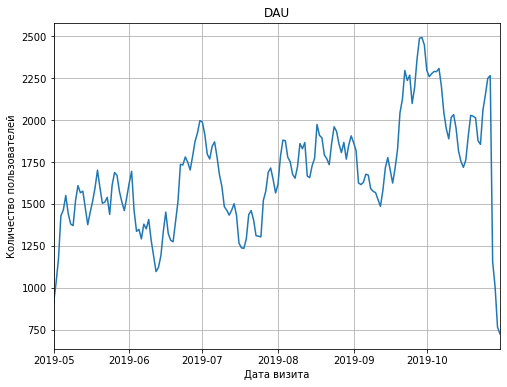

count     184.000000
mean     1684.239130
std       324.247388
min       724.000000
25%      1462.000000
50%      1682.000000
75%      1870.750000
max      2493.000000
Name: user_id, dtype: float64

In [27]:
plt.figure(figsize=(8,6))
visits['visit_day'] = visits['session_start'].dt.date
visits.groupby('visit_day')['user_id'].nunique().plot(grid=True)
plt.title('DAU')
plt.xlabel('Дата визита')
plt.ylabel('Количество пользователей')
plt.show()
visits.groupby('visit_day')['user_id'].nunique().describe()

Среднее значение DAU - 1684 пользователя, медиана практически на том же уровне - 1682. В общем и целом виден рост пользователей.

Посторим график для WAU — количество уникальных пользователей в неделю

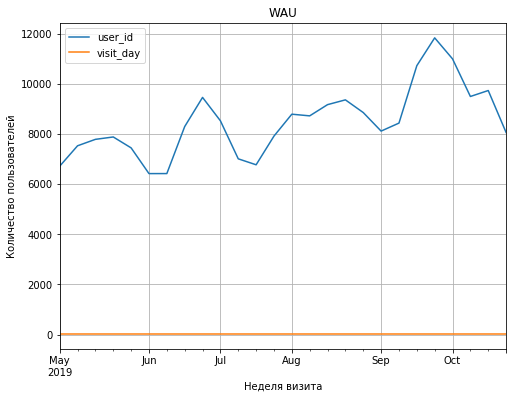

count       28.000000
mean      7942.214286
std       2414.358213
min        724.000000
25%       7345.750000
50%       8216.000000
75%       9229.750000
max      11849.000000
Name: user_id, dtype: float64

In [28]:
visits['visit_week'] = visits['session_start'].astype('datetime64[W]')
(visits
    .groupby(['visit_week'])
    .agg({'user_id': 'nunique', 'visit_day' : 'nunique'})
    .query('visit_day == 7')
).plot(grid=True, figsize=(8,6))
plt.title('WAU')
plt.xlabel('Неделя визита')
plt.ylabel('Количество пользователей')
plt.show()
visits.groupby('visit_week')['user_id'].nunique().describe()

Среднее значение WAU - 7942 пользователя, медиана расположена довольно близко к среднему - 8216. Заметен плавный рост недельной аудитории, в последнюю неделю сентября ее число приблизилось к 12000, после чего в октябре стало падать.

Посторим график для MAU — количество уникальных пользователей в месяц

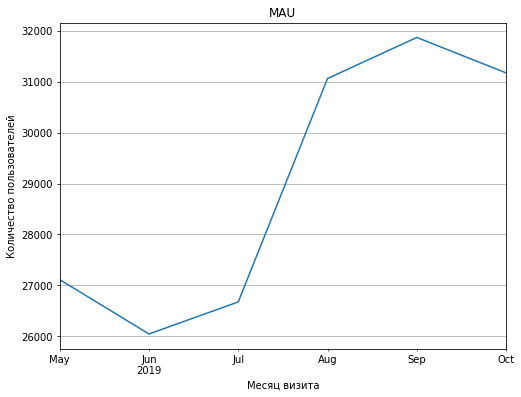

count        6.000000
mean     28989.166667
std       2644.629533
min      26042.000000
25%      26781.750000
50%      29087.500000
75%      31147.250000
max      31871.000000
Name: user_id, dtype: float64

In [29]:
plt.figure(figsize=(8,6))
visits['visit_month'] = visits['session_start'].astype('datetime64[M]')
visits.groupby('visit_month')['user_id'].nunique().plot(grid=True)
plt.title('MAU')
plt.xlabel('Месяц визита')
plt.ylabel('Количество пользователей')
plt.show()
visits.groupby('visit_month')['user_id'].nunique().describe()

Среднее значение MAU - 28989 пользователей, медиана - 29087 пользователей. Рост аудитории начина с июня и до сентября почти до 32000 пользователей в месяц. К октябрю MAU стал немного падать.

Посчитаем Sticky factor, которая отражает регулярность использования приложения

In [30]:
users_data = visits.copy()
users_data['session_year'] = users_data['session_start'].dt.year
users_data['session_month'] = users_data['session_start'].dt.month
users_data['session_week'] = (
    users_data['session_start'].dt.week
)
users_data['session_date'] = users_data['session_start'].dt.date

#для месячной аудитории
mau_total = (
    users_data.groupby(['session_year', 'session_month'])
    .agg({'user_id': 'nunique'})
    .mean()
)
#для дневной аудитории
dau_total = (
    users_data.groupby('session_date').agg({'user_id': 'nunique'}).mean()
)
#для недельной аудитории
wau_total = (
    users_data.groupby(['session_year', 'session_week'])
    .agg({'user_id': 'nunique'})
    .mean()
)
sticky_wau = dau_total / wau_total * 100 
sticky_mau = dau_total / mau_total * 100
print('Sticky Factor для недельной аудитории {}'.format(sticky_wau[0].round(2)))
print('Sticky Factor для месячной аудитории {}'.format(sticky_mau[0].round(2)))

Sticky Factor для недельной аудитории 20.16
Sticky Factor для месячной аудитории 5.81


<a id='part_3.2'></a>
**Посмотрим на число пользовательских сессий**  
[*Назад к оглавлению*](#content)

Построим гистограмму, отражающую распределение общего числа сессий в день, и выведем среднее количество сессий в день.

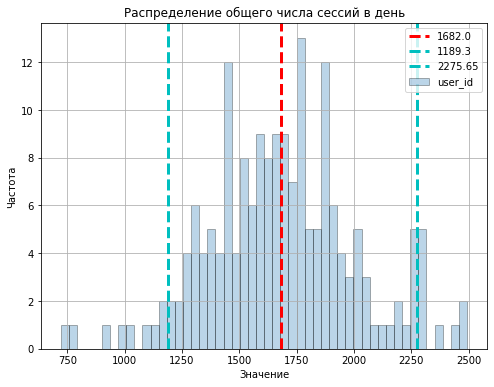

count     184.000000
mean     1684.244565
std       324.254386
min       724.000000
25%      1462.000000
50%      1682.000000
75%      1870.750000
max      2493.000000
Name: user_id, dtype: float64

In [31]:
daily_visits = visits.groupby('visit_day').agg({'user_id': 'count'}).reset_index()

plt.figure(figsize =(8, 6))
daily_visits['user_id'].plot(
                kind='hist', 
                bins=50, 
                alpha=0.3, 
                ec='black',
                )
plt.axvline(x=daily_visits['user_id'].median(),
                linewidth=3, 
                color='red', 
                linestyle='--',
                label=str(daily_visits['user_id'].median()))
plt.axvline(x=daily_visits['user_id'].quantile(.05),
                linewidth=3, 
                color='c', 
                linestyle='--',
                label=str(daily_visits['user_id'].quantile(.05)))
plt.axvline(x=daily_visits['user_id'].quantile(.95),
                linewidth=3, 
                color='c', 
                linestyle='--',
                label=str(daily_visits['user_id'].quantile(.95)))
plt.title('Распределение общего числа сессий в день')
plt.xlabel('Значение')
plt.ylabel('Частота')
plt.legend(loc='upper right')
plt.grid()
plt.show()
daily_visits['user_id'].describe()

Основная масса данных вокруг значений 1300-1800. Медиана находится на значении 1682. Среднее примерно там же - 1684. Вполне нормальное распределение.

<a id='part_3.3'></a>
**Посмотрим сколько длится одна сессия**  
[*Назад к оглавлению*](#content)

Построим гистограмму, отражающую распределение длительности сессий. 

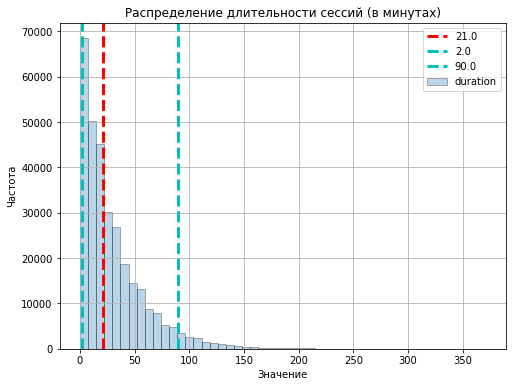

count    309901.000000
mean         29.999797
std          30.053643
min           0.000000
25%           9.000000
50%          21.000000
75%          42.000000
max         371.000000
Name: duration, dtype: float64

In [32]:
visits['duration'] = ((visits['session_end'] - visits['session_start']) / np.timedelta64(1,'m')).round()
plt.figure(figsize =(8, 6))
visits['duration'].plot(
                kind='hist', 
                bins=50, 
                alpha=0.3, 
                ec='black',
                )
plt.axvline(x=visits['duration'].median(),
                linewidth=3, 
                color='red', 
                linestyle='--',
                label=str(visits['duration'].median()))
plt.axvline(x=visits['duration'].quantile(.05),
                linewidth=3, 
                color='c', 
                linestyle='--',
                label=str(visits['duration'].quantile(.05)))
plt.axvline(x=visits['duration'].quantile(.95),
                linewidth=3, 
                color='c', 
                linestyle='--',
                label=str(visits['duration'].quantile(.95)))
plt.title('Распределение длительности сессий (в минутах)')
plt.xlabel('Значение')
plt.ylabel('Частота')
plt.legend(loc='upper right')
plt.grid()
plt.show()
visits['duration'].describe()

Гистограмма имеет форму распределения Пуассона и довольно длинный хвост в положительную сторону. Много сессий меньше минуты. Основные данные сконцентированы вокруг значений от 0 до 40 минут. Это означает, что сессия в минутах варьируется в пределах этих значений. Медианная продолжительность сессии - 21 минута. Среднее чуть больше - 30 минут.

<a id='part_3.4'></a>
**Сколько времени в среднем проходит с момента первого посещения до покупки**  
[*Назад к оглавлению*](#content)

Определим дату и время первой покупки для каждого покупателя

In [33]:
first_purchases = (orders.sort_values(by=['user_id', 'event_dt'])
                   .groupby('user_id')
                   .agg({'event_dt':'first'})
                   .reset_index()
                  )
first_purchases.columns = ['user_id', 'first_order_ts']
first_purchases['first_order_dt'] = first_purchases['first_order_ts'].dt.date
first_purchases['first_order_month'] = first_purchases['first_order_ts'].astype('datetime64[M]')
first_purchases.head()

,user_id,first_order_ts,first_order_dt,first_order_month
0,599326,2019-05-07 20:59:09,2019-05-07,2019-05-01
1,46006712,2019-06-30 03:46:52,2019-06-30,2019-06-01
2,374052872,2019-08-16 07:44:47,2019-08-16,2019-08-01
3,414791703,2019-05-04 18:06:41,2019-05-04,2019-05-01
4,785077127,2019-06-30 18:35:15,2019-06-30,2019-06-01


Добавим в данные о покупках информацию о профилях

In [34]:
first_purchases = first_purchases.merge(profiles[['user_id', 'first_ts']], on='user_id')
first_purchases['delay_min'] = (first_purchases['first_order_ts'] - first_purchases['first_ts']).dt.total_seconds() // 60
display(first_purchases[['delay_min']].describe().style.format({'delay':'{:.2f}'}))

,delay_min
count,8881
mean,2710.99
std,8692.29
min,0
25%,0
50%,0
75%,2128
max,190314


Построим график расперделения времени от начала первой сессии до первой покупки

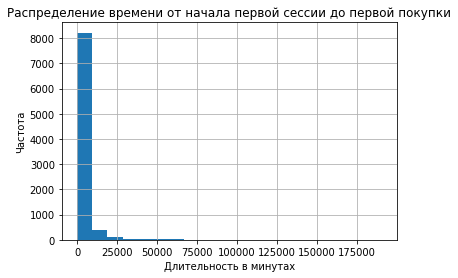

In [35]:
first_purchases['delay_min'].hist(bins=20)
plt.title('Распределение времени от начала первой сессии до первой покупки')
plt.xlabel('Длительность в минутах')
plt.ylabel('Частота')
plt.show()

Задержки до первых покупок имеют экспоненциальное распределение, с длинным хвостом. По графику можно сказать, что по времени здесь пользователи как зашли, так почти сразу же и купили, то есть разница во времени между заходом и покупкой небольшая.

<a id='part_3.5'></a>
**Рассчитаем среднее число покупок на одного покупателя за день, неделю и месяц**  
[*Назад к оглавлению*](#content)

Посчитаем среднее число покупок на покупателя.

In [36]:
report = orders.copy()
report['dt'] = report['event_dt'].dt.date
report = report.groupby('dt').agg({'user_id': 'nunique', 'event_dt': 'count'})
report.columns = ['buyers', 'orders']
report['orders_per_buyer'] = report['orders'] / report['buyers']
display(report)
report.describe()

,buyers,orders,orders_per_buyer
dt,,,
2019-05-01,25,25,1.0
2019-05-02,29,29,1.0
2019-05-03,44,44,1.0
2019-05-04,56,56,1.0
2019-05-05,58,58,1.0
...,...,...,...
2019-10-27,340,340,1.0
2019-10-28,287,287,1.0
2019-10-29,315,315,1.0


,buyers,orders,orders_per_buyer
count,184.000000,184.000000,184.000000
mean,218.532609,218.543478,1.000035
std,77.643145,77.657003,0.000331
min,25.000000,25.000000,1.000000
25%,157.750000,157.750000,1.000000
50%,227.500000,227.500000,1.000000
75%,270.500000,270.500000,1.000000
max,364.000000,364.000000,1.003390


Выходит в среднем одна покупка в день на пользователя.

Посмотрим сколько будет в неделю

In [37]:
report2 = orders.copy()
report2['dt'] = report2['event_dt'].dt.date 
report2['week'] = report2['dt'].astype('datetime64[W]')
report2 = report2.groupby('week').agg({'user_id': 'nunique', 'event_dt': 'count'})
report2.columns = ['buyers', 'orders']
report2['orders_per_buyer'] = report2['orders'] / report2['buyers']
display(report2)
report2.describe()

,buyers,orders,orders_per_buyer
week,,,
2019-04-25,25,25,1.000000
2019-05-02,268,404,1.507463
2019-05-09,395,620,1.569620
2019-05-16,523,767,1.466539
2019-05-23,617,875,1.418152
2019-05-30,701,1011,1.442225
2019-06-06,743,1013,1.363392
2019-06-13,808,1095,1.355198
2019-06-20,925,1230,1.329730


,buyers,orders,orders_per_buyer
count,28.000000,28.000000,28.000000
mean,1094.892857,1436.142857,1.316172
std,507.924560,634.019203,0.118059
min,25.000000,25.000000,1.000000
25%,732.500000,1012.500000,1.282209
50%,1128.500000,1522.500000,1.306324
75%,1455.500000,1879.000000,1.359679
max,1836.000000,2307.000000,1.569620


В неделю в среднем выходит 1.3 покупки

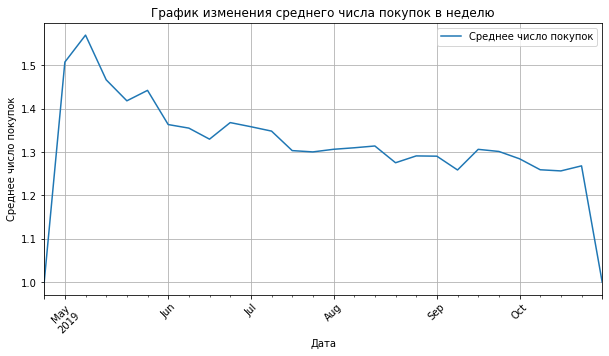

In [38]:
report2.plot(y='orders_per_buyer',
           figsize=(10, 5),
           grid=True,
           rot=45,        
           label='Среднее число покупок',                       
           legend=True)

plt.title('График изменения среднего числа покупок в неделю')
plt.xlabel('Дата')
plt.ylabel('Среднее число покупок')
plt.show()

На графике видно, что покупки постепено снижаются.

In [39]:
report3 = orders.copy()
report3['dt'] = report3['event_dt'].dt.date 
report3['month'] = report3['dt'].astype('datetime64[M]')
report3 = report3.groupby('month').agg({'user_id': 'nunique', 'event_dt': 'count'})
report3.columns = ['buyers', 'orders']
report3['orders_per_buyer'] = report3['orders'] / report3['buyers']
display(report3)
report3.describe()

,buyers,orders,orders_per_buyer
month,,,
2019-05-01,1226,2962,2.415987
2019-06-01,2130,4875,2.288732
2019-07-01,2801,6556,2.340593
2019-08-01,3476,7582,2.181243
2019-09-01,4124,8430,2.044132
2019-10-01,4670,9807,2.100000


,buyers,orders,orders_per_buyer
count,6.000000,6.000000,6.000000
mean,3071.166667,6702.000000,2.228448
std,1280.003190,2479.848947,0.144278
min,1226.000000,2962.000000,2.044132
25%,2297.750000,5295.250000,2.120311
50%,3138.500000,7069.000000,2.234988
75%,3962.000000,8218.000000,2.327628
max,4670.000000,9807.000000,2.415987


В месяц выходит 2.2 покупки на пользователя.

Что там с там с графиком

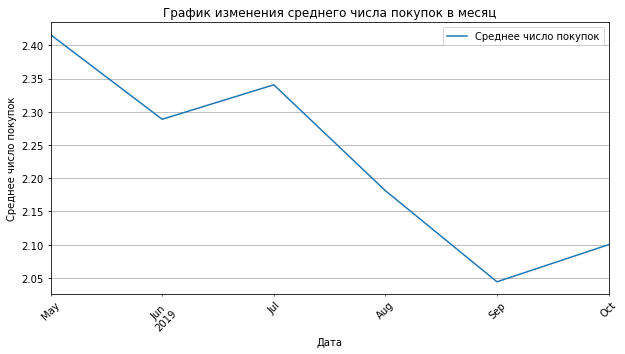

In [40]:
report3.plot(y='orders_per_buyer',
           figsize=(10, 5),
           grid=True,
           rot=45,        
           label='Среднее число покупок',                       
           legend=True)

plt.title('График изменения среднего числа покупок в месяц')
plt.xlabel('Дата')
plt.ylabel('Среднее число покупок')
plt.show()

Видим спад среднего числа покупок во времени - с 2.4 в мае 2019 года до 2 в сентябре (минимум). К октябрю число заказов стало немного расти и достигло 2.1.

<a id='part_3.6'></a>
**Посчитаем средний чек за день, неделю и месяц.**  
[*Назад к оглавлению*](#content)

In [41]:
daily_revenue_report = orders.copy()
daily_revenue_report['dt'] = daily_revenue_report['event_dt'].dt.date
daily_revenue_report = daily_revenue_report.groupby('dt').agg({'revenue': 'sum', 'event_dt': 'count'})
daily_revenue_report.columns = ['daily_revenue', 'orders']
daily_revenue_report['revenue_per_order'] = daily_revenue_report['daily_revenue'] / daily_revenue_report['orders']
display(daily_revenue_report)
daily_revenue_report.describe()

,daily_revenue,orders,revenue_per_order
dt,,,
2019-05-01,125.75,25,5.030000
2019-05-02,144.71,29,4.990000
2019-05-03,221.56,44,5.035455
2019-05-04,327.44,56,5.847143
2019-05-05,337.42,58,5.817586
...,...,...,...
2019-10-27,1722.60,340,5.066471
2019-10-28,1486.13,287,5.178153
2019-10-29,1642.85,315,5.215397


,daily_revenue,orders,revenue_per_order
count,184.000000,184.000000,184.000000
mean,1173.711304,218.543478,5.375884
std,414.056103,77.657003,0.246025
min,125.750000,25.000000,4.990000
25%,857.220000,157.750000,5.185476
50%,1211.775000,227.500000,5.335974
75%,1465.622500,270.500000,5.544885
max,1894.360000,364.000000,6.204286


Средняя сумма заказов за день - 1211.7 (медиана), 1173.7 (среднее). Средний чек - 5.33 у.е.

In [42]:
weekly_revenue_report = orders.copy()
weekly_revenue_report['dt'] = weekly_revenue_report['event_dt'].dt.date 
weekly_revenue_report['week'] = weekly_revenue_report['dt'].astype('datetime64[W]')
weekly_revenue_report = weekly_revenue_report.groupby('week').agg({'revenue': 'sum', 'event_dt': 'count'})
weekly_revenue_report.columns = ['weekly_revenue', 'orders']
weekly_revenue_report['revenue_per_order'] = weekly_revenue_report['weekly_revenue'] / weekly_revenue_report['orders']
display(weekly_revenue_report)
weekly_revenue_report.describe()

,weekly_revenue,orders,revenue_per_order
week,,,
2019-04-25,125.75,25,5.030000
2019-05-02,2242.96,404,5.551881
2019-05-09,3266.80,620,5.269032
2019-05-16,4020.33,767,5.241630
2019-05-23,4689.25,875,5.359143
2019-05-30,5461.89,1011,5.402463
2019-06-06,5532.87,1013,5.461866
2019-06-13,5907.05,1095,5.394566
2019-06-20,6716.70,1230,5.460732


,weekly_revenue,orders,revenue_per_order
count,28.000000,28.000000,28.000000
mean,7712.960000,1436.142857,5.363435
std,3382.587997,634.019203,0.116345
min,125.750000,25.000000,5.030000
25%,5515.125000,1012.500000,5.283347
50%,8292.720000,1522.500000,5.351724
75%,9984.210000,1879.000000,5.454608
max,12407.930000,2307.000000,5.551881


Средняя сумма заказов за неделю - 8292 (медиана), 7713 (среднее). Средний чек - 5.35

In [43]:
monthly_revenue_report = orders.copy()
monthly_revenue_report['dt'] = monthly_revenue_report['event_dt'].dt.date 
monthly_revenue_report['month'] = monthly_revenue_report['dt'].astype('datetime64[M]')
monthly_revenue_report = monthly_revenue_report.groupby('month').agg({'revenue': 'sum', 'event_dt': 'count'})
monthly_revenue_report.columns = ['monthly_revenue', 'orders']
monthly_revenue_report['revenue_per_order'] = monthly_revenue_report['monthly_revenue'] / monthly_revenue_report['orders']
display(monthly_revenue_report)
monthly_revenue_report.describe()

,monthly_revenue,orders,revenue_per_order
month,,,
2019-05-01,15787.38,2962,5.329973
2019-06-01,26428.25,4875,5.421179
2019-07-01,35988.44,6556,5.489390
2019-08-01,40401.18,7582,5.328565
2019-09-01,44941.70,8430,5.331163
2019-10-01,52415.93,9807,5.344747


,monthly_revenue,orders,revenue_per_order
count,6.000000,6.000000,6.000000
mean,35993.813333,6702.000000,5.374169
std,13183.136587,2479.848947,0.066684
min,15787.380000,2962.000000,5.328565
25%,28818.297500,5295.250000,5.330270
50%,38194.810000,7069.000000,5.337955
75%,43806.570000,8218.000000,5.402071
max,52415.930000,9807.000000,5.489390


Средняя сумма заказов за месяц - 38195 (медиана), 35994 (среднее). Средний чек - 5.33 Есть предположение, что данные, предоставленные для анализа, это данные сервиса с подписной моделью, где списание происходит раз в месяц.

<a id='part_3.7'></a>
**Вывод**  
[*Назад к оглавлению*](#content)

По метрикиам DAU, MAU, WAU заметен рост пользователей.
Среднее значение DAU - 1684.2 пользователя, медиана практически на том же уровне - 1682.

Среднее значение WAU - 7942 пользователя, медиана расположена довольно близко к среднему - 8216. Заметен плавный рост недельной аудитории, в последнюю неделю сентября ее число приблизилось к 12000, после чего в октябре стало падать.

Среднее значение MAU - 28989 пользователей, медиана - 29087 пользователей. Рост аудитории начина с июня и до сентября почти до 32000 пользователей в месяц. К октябрю MAU стал немного падать.

Основная масса данных вокруг значений 1300-1800. Медиана находится на значении 1682. Среднее примерно там же - 1684. Вполне нормальное распределение.

Гистограмма имеет форму распределения Пуассона и довольно длинный хвост в положительную сторону. Много сессий меньше минуты. Основные данные сконцентированы вокруг значений от 0 до 40 минут. Это означает, что сессия в минутах варьируется в пределах этих значений. Медианная продолжительность сессии - 21 минута. Среднее чуть больше - 30 минут.

Задержки до первых покупок имеют экспоненциальное распределение, с длинным хвостом. По графику можно сказать, что по времени здесь пользователи как зашли, так почти сразу же и купили, то есть разница во времени между заходом и покупкой небольшая.

Посчитано среднее число покупок на покупателя. В среднем на покупателя приходится 1 покупка в день. 

В среднем на покупателя приходится 1.3 покупки в неделю.

Посмотрим на среднее число покупок в месяц. В среднем на покупателя приходится 2.2 покупки в месяц.

Рассчитан средний чек за день, неделю и месяц. Применена группировка по дню/неделе/месяцу и рассчитана выручка, деленная на количество заказов. Средняя сумма заказов за день - 1211.7 (медиана), 1173.7 (среднее). Средний чек - 5.33 у.е.

Средняя сумма заказов за неделю - 8292 (медиана), 7713 (среднее). Средний чек - 5.35. Максимальные значения (5.55) среднего недельного чека наблюдаются в мае и начале июля 2019 года.

Средняя сумма заказов за месяц - 38195 (медиана), 35994 (среднее). Средний чек - 5.33 Есть предположение, что данные, предоставленные для анализа, это данные сервиса с подписной моделью, где списание происходит раз в месяц.

<a id='part_4'></a>
# Шаг 4. Маркетинг
[*Назад к оглавлению*](#content)

<a id='part_4.1'></a>
**Рассчитаем общую сумму расходов на маркетинг**  
[*Назад к оглавлению*](#content)

In [44]:
display(costs.sum())
costs.describe()

costs    105497.3
dtype: float64

,costs
count,1800.000000
mean,58.609611
std,107.740223
min,0.800000
25%,6.495000
50%,12.285000
75%,33.600000
max,630.000000


Всего на маркетинг потрачено 105497.3 у.е.

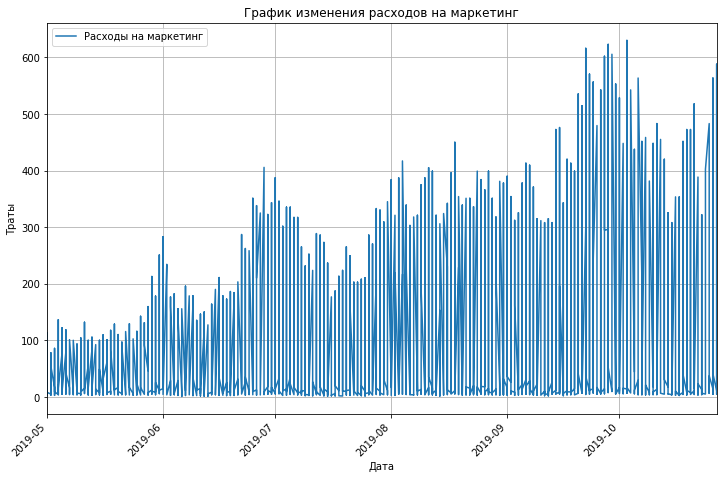

In [45]:
costs.plot(y='costs',
           x='dt',
           figsize=(12, 8),
           grid=True,
           rot=45,        
           label='Расходы на маркетинг',                       
           legend=True) 

plt.title('График изменения расходов на маркетинг')
plt.xlabel('Дата')
plt.ylabel('Траты')
plt.show()

Увеличение расходов на маркетинг с течением времени. В конце сентября - начале октября они достигли чуть больше 600 у.е., после чего стали немного снижаться до 400, а затем к концу октября вновь стремились к 600

In [46]:
channel_costs_report = pd.DataFrame()
channel_costs_report['costs'] = costs.groupby('channel')['costs'].sum()
channel_costs_report['share'] = ((channel_costs_report['costs'] / costs['costs'].sum()) * 100)
channel_costs_report.sort_values(by='share', ascending=False).style.format({'share': '{:.2f}%', 'payer_share': '{:.2f}%'})

,costs,share
channel,,
TipTop,54751.3,51.90%
FaceBoom,32445.6,30.75%
WahooNetBanner,5151,4.88%
AdNonSense,3911.25,3.71%
OppleCreativeMedia,2151.25,2.04%
RocketSuperAds,1833,1.74%
LeapBob,1797.6,1.70%
lambdaMediaAds,1557.6,1.48%
MediaTornado,954.48,0.90%


Больше всего трат приходитя на источник TipTop (51.9%). Следом идет источник FaceBoom(30.75%). Далее идут низкозатратные источники WahooNetBanner (4.88%), AdNonSense (3.71%), OppleCreativeMedia (2.04%). На оставшиеся источники приходится 1-2% трат.

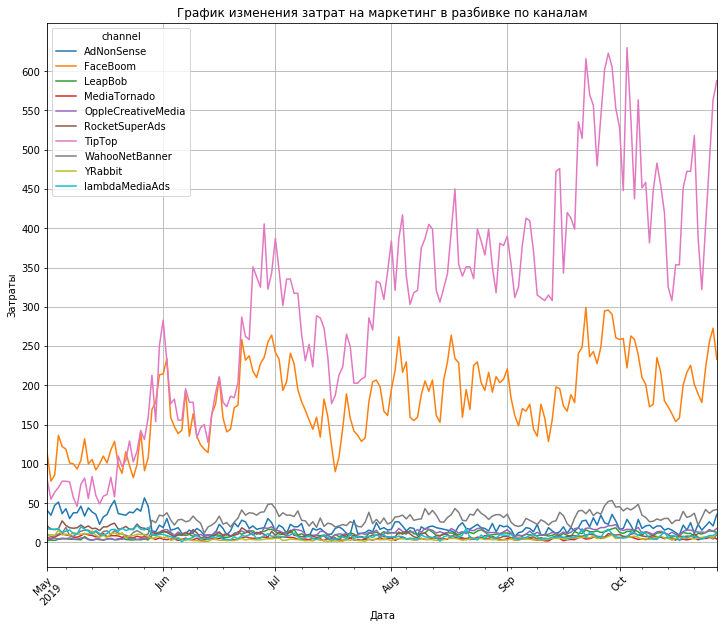

In [47]:
filtered_data = costs.pivot_table(
        index='dt', columns='channel', values='costs', aggfunc='sum'
    )
filtered_data.plot(                                             
           figsize=(12, 10),
           grid=True,
           rot=45,        
           label='Каналы',                      
           legend=True) 

plt.yticks(np.arange(0, 650, 50))
plt.title('График изменения затрат на маркетинг в разбивке по каналам')
plt.xlabel('Дата')
plt.ylabel('Затраты')
plt.show()

Больше всего трат по двум каналам это TipTop и FaceBoom.  
Больше всего трафика закупали у TipTop и к октябрю число трат стало чуть больше 600 у.е. Число трат на FaceBoom находится в районе 300. И если остальные источники не показывают какую-либо значительную динамику, то затраты на источник Tip-Top возрастают со временем. Остальные каналы привлечения обходятся довольно дешево. Возможно, стоит посмотреть на них в отдельном срезе, чтобы понять динамику, тк на этом графике данные по ним недостаточно показательны.

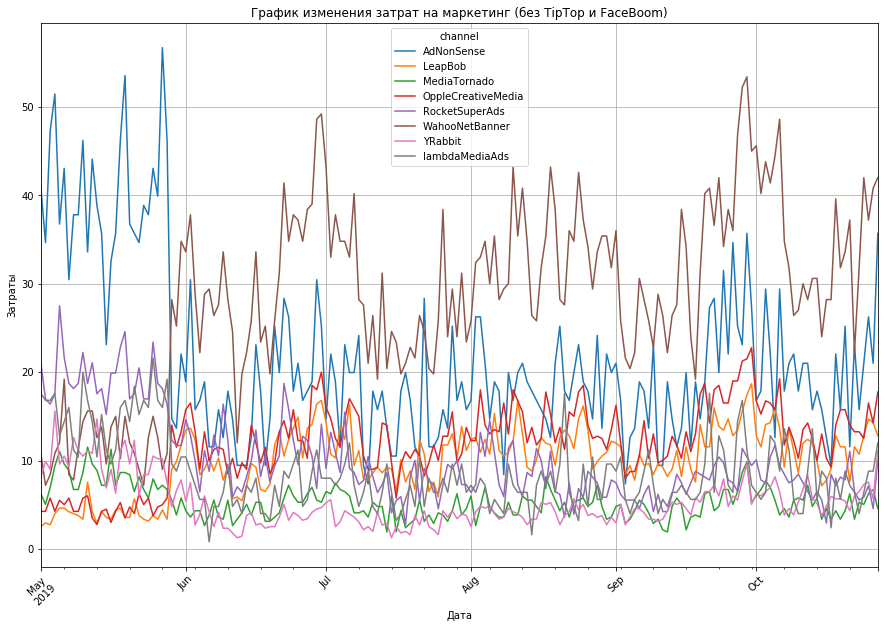

In [48]:
filtered_data2 = costs[~costs['channel'].isin(['TipTop', 'FaceBoom'])].pivot_table(
        index='dt', columns='channel', values='costs', aggfunc='sum'
    )

filtered_data2.plot(                                             
           figsize=(15, 10),
           grid=True,
           rot=45,        
           label='Каналы',                 
           legend=True) 

plt.yticks(np.arange(0,  60, 10))
plt.title('График изменения затрат на маркетинг (без TipTop и FaceBoom)')
plt.xlabel('Дата')
plt.ylabel('Затраты')
plt.show()

Исключая TipTop и FaceBoom с июня начали расти траты на WahooNetBanner к октябрю их число было в районе 53 у.е.. Затраты на AdNonSense, наоборот, стали снижаться с июня 2019 года (с 55 до 35). По остальным источникам траты варьируются в пределах 3-20 у.е.

<a id='part_4.2'></a>
**Сколько в среднем стоило привлечение одного пользователя из каждого источника**  
[*Назад к оглавлению*](#content)

Возьмем информацию о стоимости привлечения есть из колонки 'acquisition_cost', таблицы profiles. Рассчитаем средний CAC на одного пользователя для всего проекта и для каждого источника трафика. Будем использовать профили пользователей.

In [49]:
profiles.describe()

,user_id,acquisition_cost
count,1.500080e+05,150008.000000
mean,4.993238e+11,0.703278
std,2.889483e+11,0.954097
min,5.993260e+05,0.000000
25%,2.489249e+11,0.000000
50%,4.977046e+11,0.247500
75%,7.494919e+11,1.108943
max,9.999996e+11,3.715385


Медианная стоимость привлечения одного пользователя - 0.24. При этом среднее находится на значении 0.7. Вероятно, в какие-то периоды мы тратили на пользователей больше, и в данных есть какие-то выбросы, которые влияют на разницу в стреднем и медианой. Максимальная стоимость привлечения пользователя - 3.71 у.е.

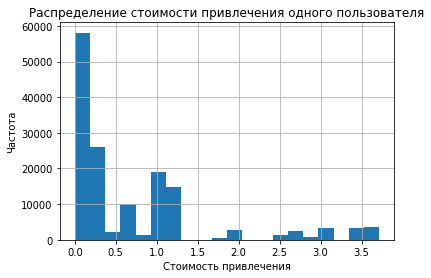

In [50]:
profiles['acquisition_cost'].hist(bins=20)
plt.title('Распределение стоимости привлечения одного пользователя')
plt.xlabel('Стоимость привлечения')
plt.ylabel('Частота')
plt.show()

На разницу между медианой и средним оказывает влияние большое число нулевой стоимости пользователей. Вероятно, это органический трафик.

In [51]:
cac_by_channel = pd.DataFrame()
cac_by_channel['acquisition_cost_mean'] = profiles.groupby('channel')['acquisition_cost'].mean()
cac_by_channel.sort_values(by='acquisition_cost_mean', ascending=False).style.format({'acquisition_cost_mean': '{:.2f}'})

,acquisition_cost_mean
channel,
TipTop,2.80
FaceBoom,1.11
AdNonSense,1.01
lambdaMediaAds,0.72
WahooNetBanner,0.60
RocketSuperAds,0.41
OppleCreativeMedia,0.25
YRabbit,0.22
MediaTornado,0.22


Самый дорогой трафик - TipTop (средняя стоимость - 2.80 за пользователя), далее идет FaceBoom и AdNonSense примерно в равной ценовой категории (1.11 и 1.01 соответственно). Органический трафик бесплатен, остальные каналы берут за пользователя от 0.21 до 0.72 у.е.

<a id='part_4.3'></a>
**Вывод**  
[*Назад к оглавлению*](#content)

Всего на маркетинг потрачено 105497.3 у.е.

Увеличение расходов на маркетинг с течением времени. В конце сентября - начале октября они достигли чуть больше 600 у.е., после чего стали немного снижаться до 400, а затем к концу октября вновь стремились к 600

Больше всего трат приходитя на источник TipTop (51.9%). Следом идет источник FaceBoom(30.75%). Далее идут низкозатратные источники WahooNetBanner (4.88%), AdNonSense (3.71%), OppleCreativeMedia (2.04%). На оставшиеся источники приходится 1-2% трат.

Больше всего трат по двум каналам это TipTop и FaceBoom.
Больше всего трафика закупали у TipTop и к октябрю число трат стало чуть больше 600 у.е. Число трат на FaceBoom находится в районе 300. И если остальные источники не показывают какую-либо значительную динамику, то затраты на источник Tip-Top возрастают со временем. Остальные каналы привлечения обходятся довольно дешево. Возможно, стоит посмотреть на них в отдельном срезе, чтобы понять динамику, тк на этом графике данные по ним недостаточно показательны.

Исключая TipTop и FaceBoom с июня начали расти траты на WahooNetBanner к октябрю их число было в районе 53 у.е.. Затраты на AdNonSense, наоборот, стали снижаться с июня 2019 года (с 55 до 35). По остальным источникам траты варьируются в пределах 3-20 у.е.

Выяснено, сколько в среднем стоило привлечение одного пользователя из каждого источника.

Рассчитан средний CAC на одного пользователя для всего проекта и для каждого источника трафика. Медианная стоимость привлечения одного пользователя - 0.24. При этом среднее находится на значении 0.7. Вероятно, в какие-то периоды мы тратили на пользователей больше, и в данных есть какие-то выбросы, которые влияют на разницу в стреднем и медианой. Максимальная стоимость привлечения пользователя - 3.71 у.е.

На разницу между медианой и средним оказывает влияние большое число нулевой стоимости пользователей. Вероятно, это органический трафик.

Самый дорогой трафик - TipTop (средняя стоимость - 2.80 за пользователя), далее идет FaceBoom и AdNonSense примерно в равной ценовой категории (1.11 и 1.01 соответственно). Органический трафик бесплатен, остальные каналы берут за пользователя от 0.21 до 0.72 у.е.

<a id='part_5'></a>
# Шаг 5. Зададим функции для расчета и анализа LTV, ROI, удержания и конверсии
[*Назад к оглавлению*](#content)

Момент анализа у нас 01.11.2019, а горизонт анализа - 14 дней.

Из расчетов нам следует исключить пользователей с органическим трафиком, поскольку мы за них ничего не платим.

In [52]:
import time
from datetime import datetime
from datetime import date, timedelta as td

# момент анализа 
observation_date = datetime(2019, 11, 1).date()
# горизонт анализа 
horizon_days = 14

In [53]:
# функция для расчёта удержания

def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

In [54]:
# функция для визуализации удержания

def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show() 

In [55]:
# функция для расчёта конверсии

def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 

In [56]:
# функция для визуализации конверсии

def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 

In [57]:
# функция для расчёта LTV и ROI

def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # что мы здесь делаем???
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    ) 

Зададим также функции для визуализации этих метрик — filter_data(), plot_retention(), plot_conversion() и plot_ltv_roi().

In [58]:
# функция для сглаживания фрейма

def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df 

In [59]:
# функция для визуализации LTV и ROI

def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 

<a id='part_6'></a>
# Шаг 6. Оценим окупаемость рекламы для привлечения пользователей
[*Назад к оглавлению*](#content)

С помощью LTV и ROI:

- Проанализируем общую окупаемость рекламы;
- Проанализируем окупаемость рекламы с разбивкой по устройствам;
- Проанализируем окупаемость рекламы с разбивкой по странам;
- Проанализируем окупаемость рекламы с разбивкой по рекламным каналам.

Опишем проблемы, которые обнаружили. Ответим на вопросы:

- Окупается ли реклама, направленная на привлечение пользователей в целом?
- Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?
- Чем могут быть вызваны проблемы окупаемости? Изучите конверсию и удержание с разбивкой по устройствам, странам, рекламным каналам.

Опишем возможные причины обнаруженных проблем и сформируем рекомендации для рекламного отдела. При решении этого шага считаем, что смотрим данные 1-го ноября 2019 года и что в организации принято считать, что окупаемость должна наступать не позднее, чем через 2 недели после привлечения пользователей.

<a id='part_6.1'></a>
**Проанализируем общую окупаемость рекламы.**  
[*Назад к оглавлению*](#content)

Оценим общую ситуацию — посмотрим на окупаемость рекламы. Рассчитаем и визуализируем LTV и ROI, вызвав функции get_ltv() и plot_ltv_roi().

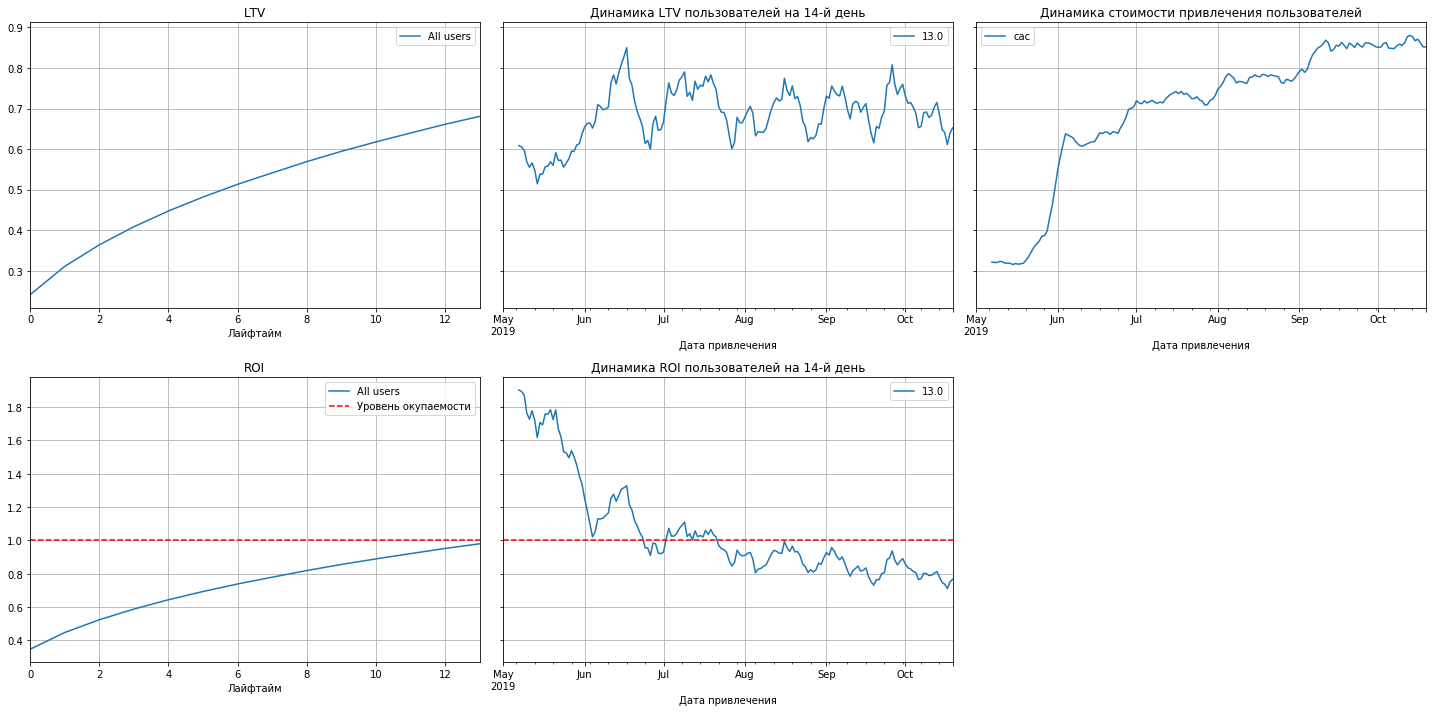

In [60]:
# считаем LTV и ROI
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days
)

# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days) 

Можно сделать такие выводы:
1. Реклама не окупается к концу 2й недели. ROI — около 80%.
2. CAC нестабилен. Рекламный бюджет увеличивается с течением времени.
3. На LTV влияет сезонный фактор, но в целом, этот показатель достаточно стабилен. Значит, дело не в ухудшении качества пользователей.
4. ROI пользователей неумолимо падает. До июля показатель был выше уровня окупаемости, но после стал падать до 0.6.

<a id='part_6.2'></a>
**Проанализируем окупаемость рекламы с разбивкой по устройствам**  
[*Назад к оглавлению*](#content)

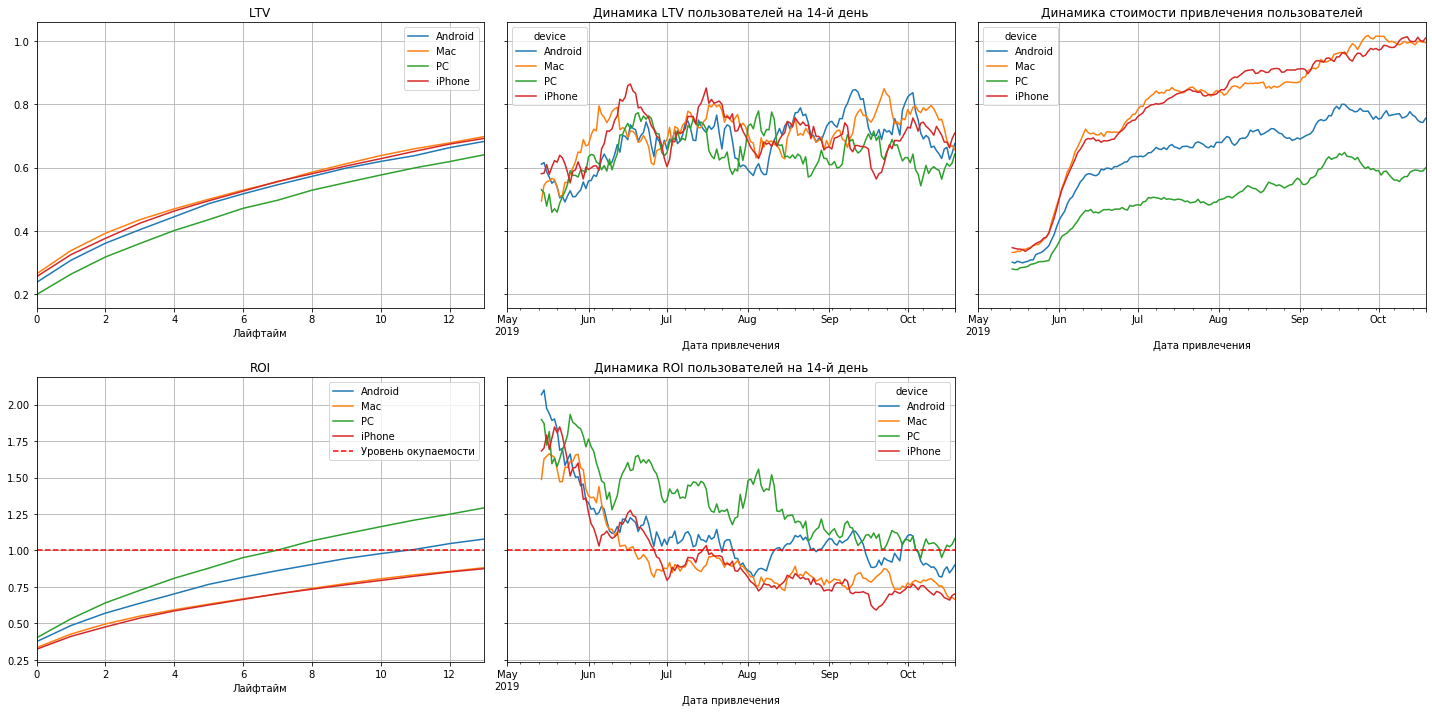

In [61]:
# смотрим окупаемость с разбивкой по устройствам

dimensions = ['device']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

Пользователи всех устройств окупались до июня, а потом что-то пошло не так, особенно для владельцев Mac и Iphone. К сентябрю (и какое-то время в августе) ROI пользователей PC на 14 день был на грани окупаемости, ROI всех остальных устройств был уже ниже уровня начиная с июня. LTV пользователей всё так же подвержен сезонности, но стабилен. Стоимость привлечения пользователей PC самая низкая, а ROI - наоборот, выше остальных. В целом, видим, что стоимость привлечения пользователей всех устройств росла за рассматриваемый период.

Внимание стоит обратить на владельцев Mac и iPhone - стоимость их привлечения высока (и растет от месяца к месяцу), а окупаемоcть страдает

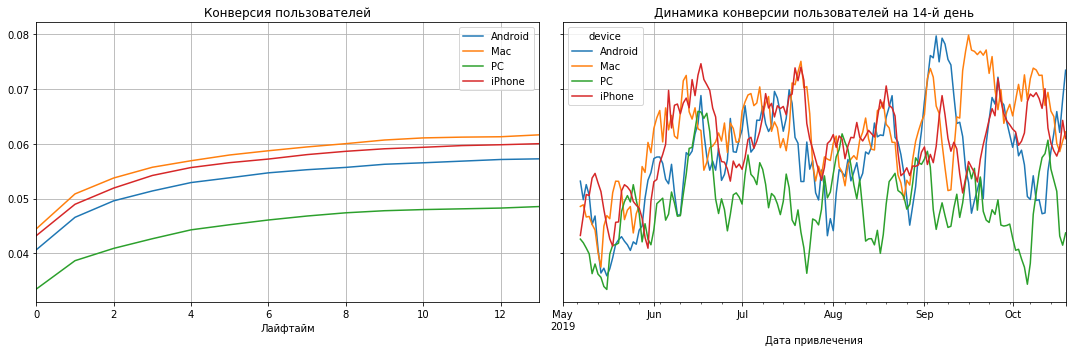

In [62]:
dimensions = ['device']
# смотрим конверсию с разбивкой по устройствам

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

Судя по графикам, пользователи Mac, Android и iPhone конвертируются хорошо. Видимо, дело в удержании. Вызовем функции get_retention() и plot_retention(), чтобы рассчитать и отразить на графиках этот показатель.

In [63]:
visits['visit_day'] = pd.to_datetime(visits['visit_day'], format="%Y-%m-%d")

In [64]:
# функция для расчёта удержания

def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 

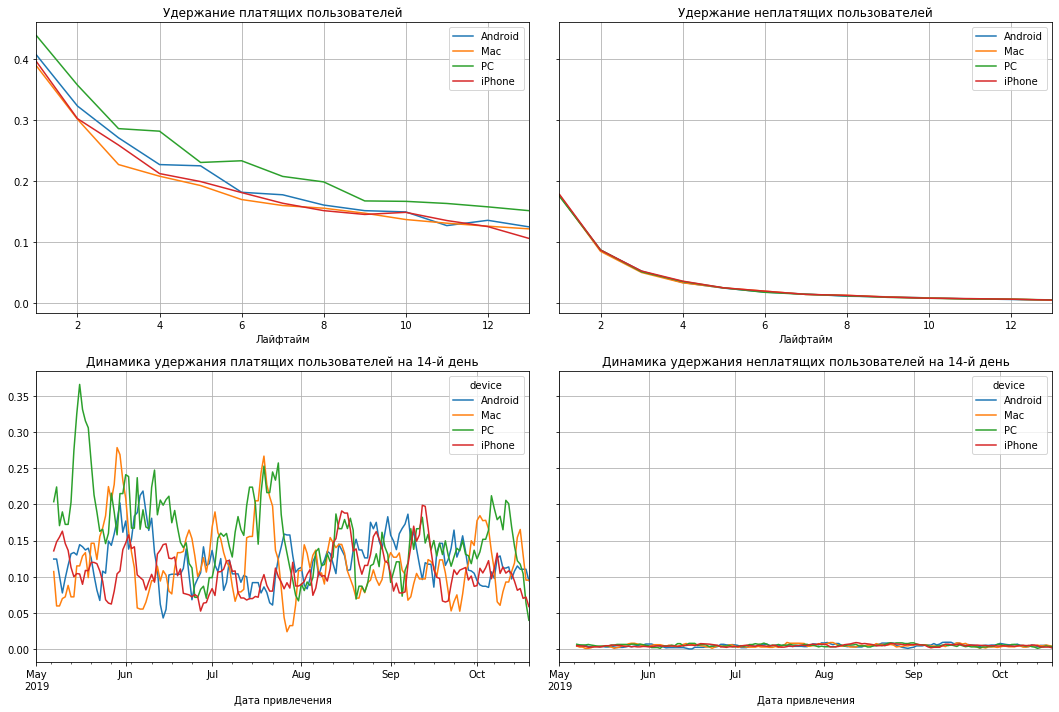

In [65]:
# смотрим удержание с разбивкой по устройствам
dimensions = ['device']

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days) 

Не видно, чтобы пользователи каких-то определенных устройств особо плохо удерживались. Неплатящие пользователи удерживаются стабильно плохо, а из платящих лучше всего удерживаются пользователи PC, хуже - владельцы iPhone и Mac.

<a id='part_6.3'></a>
**Проанализируем окупаемость рекламы с разбивкой по странам**  
[*Назад к оглавлению*](#content)

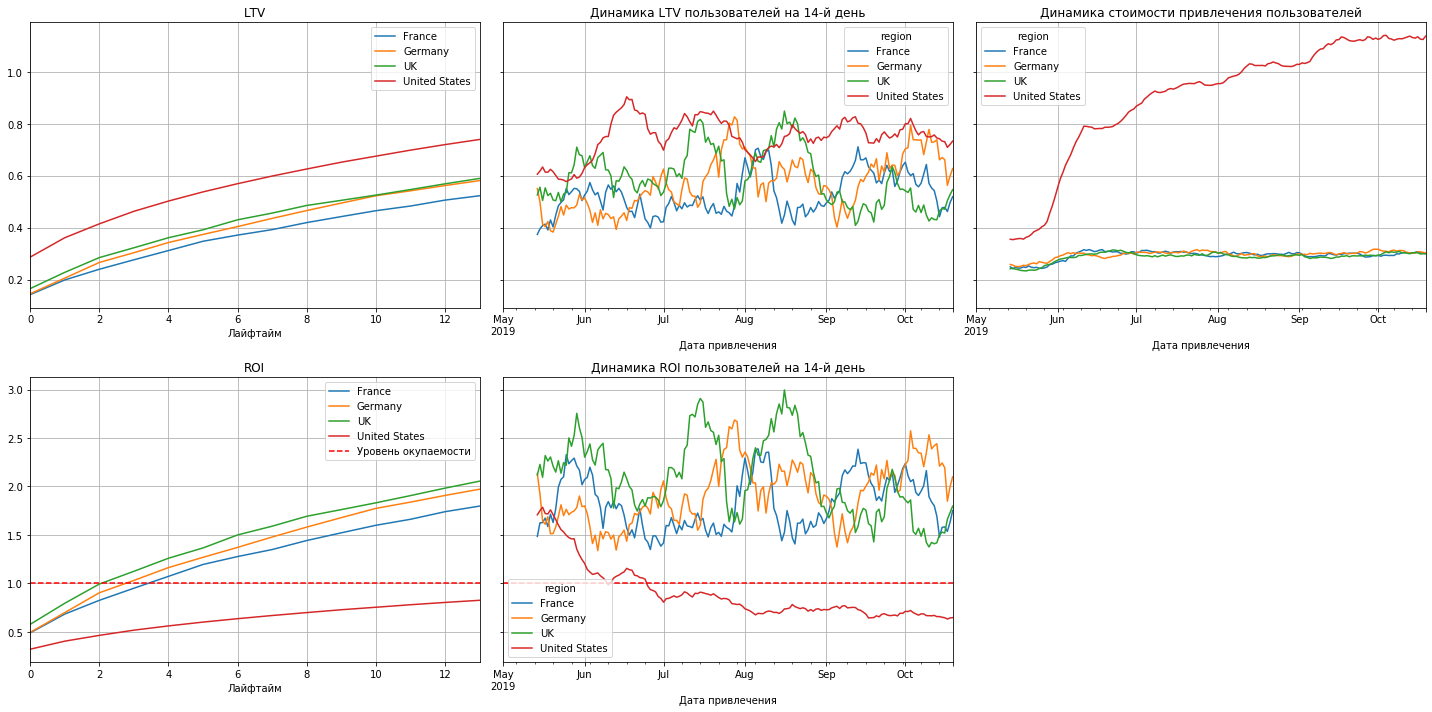

In [66]:
# смотрим окупаемость с разбивкой по странам

dimensions = ['region']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

По графикам видно:
1. Реклама окупается не везде. В США уровень окупаемости рекламы низкий, а, как мы помним, у нас основная аудитория - это пользователи из США.
2. При этом стоимость привлечения пользователей из Америки - самая высокая. И она растет.
3. LTV всё так же подвержен сезонности, но стабилен.
4. Лучше всего окупается Великобритании и Германия. Явный аутсайдер - США. Причем окупаемость пользователей начала падать с конца июня 2019 года. Возможно, неудачный релиз, запуск похожего продукта у конкурентов или какие-то  изменения в продукте сыграли такую роль, и сервис стал менеее привлекательным для пользователей.

Посмотрим повнимательнее на США.  
Посчитаем и визуализируем конверсию, вызвав функции get_conversion() и plot_conversion()

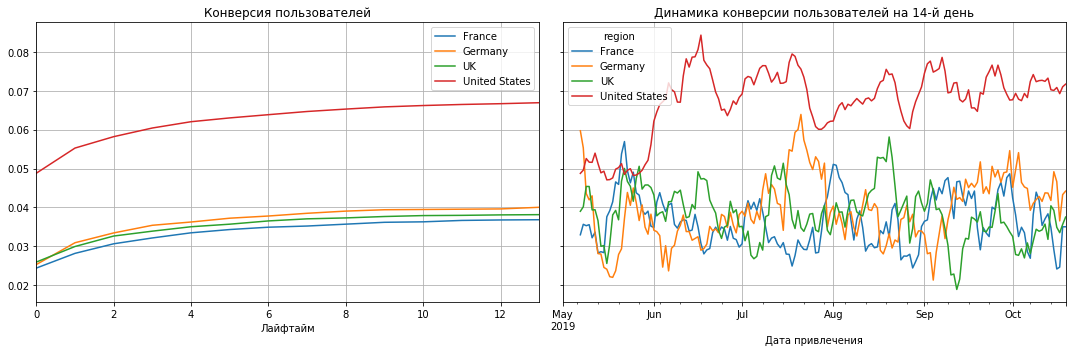

In [67]:
# смотрим конверсию с разбивкой по странам

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

Слабая конверсия у пользователей из Великобритании, Германии и Франции. Но и их доля относительно всех пользователей не такая большая.

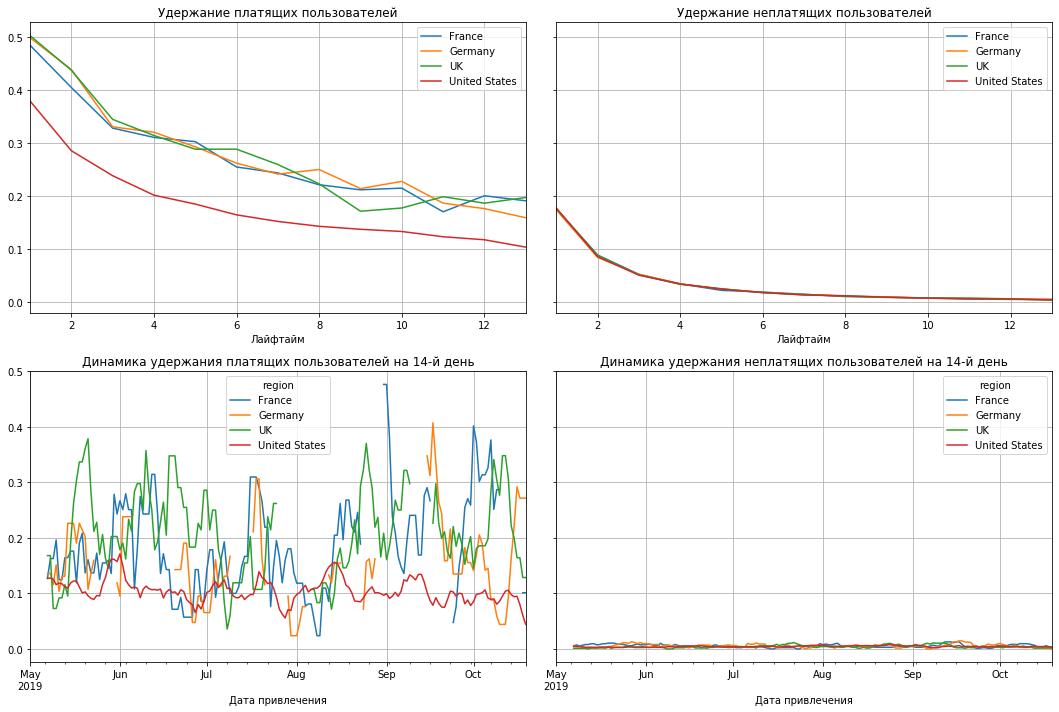

In [68]:
# смотрим удержание с разбивкой по странам

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days) 

Пользователи из США явно плохо удерживаются.

<a id='part_6.4'></a>
**Проанализируем окупаемость рекламы с разбивкой по рекламным каналам**  
[*Назад к оглавлению*](#content)

Проверим каналы. Возможно, на окупаемость влияет неудачная реклама в каком-нибудь одном канале.

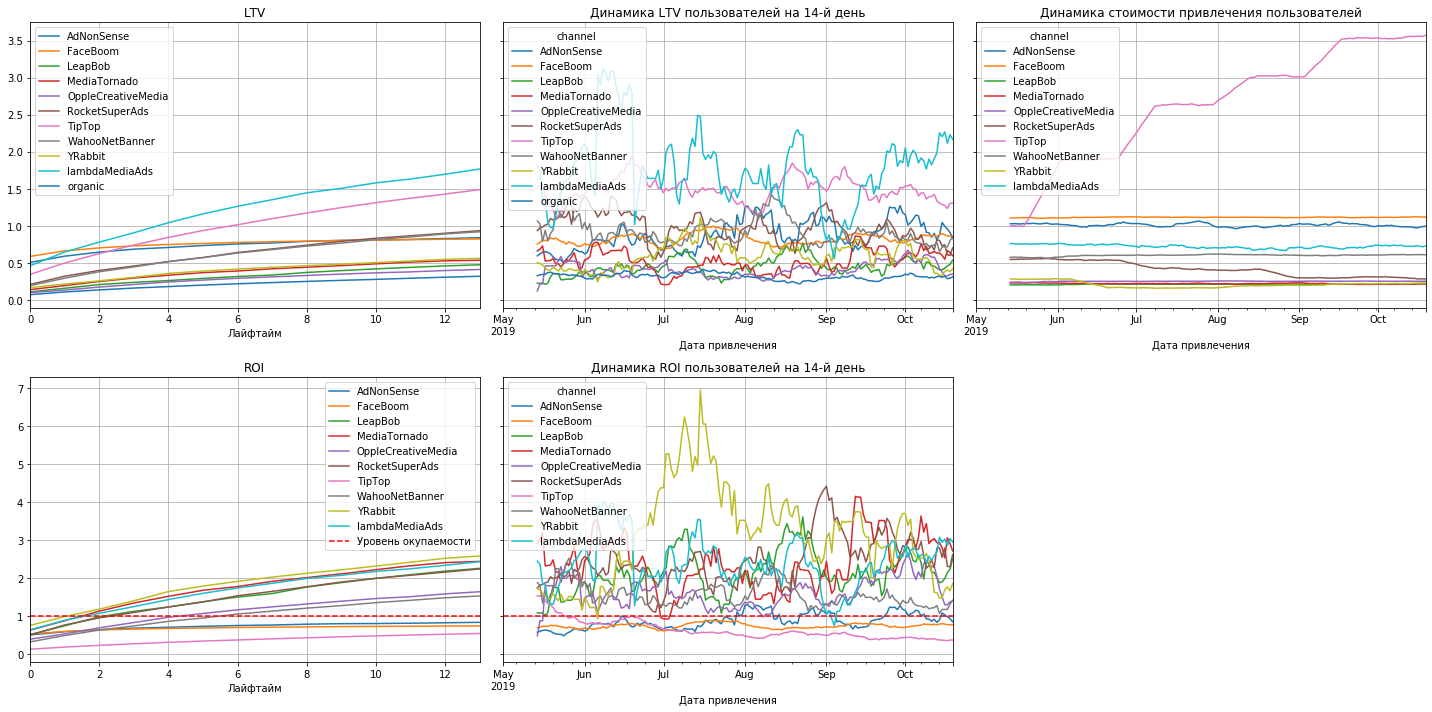

In [69]:
# смотрим окупаемость с разбивкой по источникам привлечения

dimensions = ['channel']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

По графикам видно:
1. Видим большой рост стоимости привлечения пользователей из рекламного канала TipTop. Кажется, слишком много средств было потрачено на эту рекламную сеть, но выхлопа от нее получилось не так много, как ожидалось.
2. Не окупаются пользователи, привлеченные из каналов LeapBop, FaceBoom, TipTop.
3. Хорошо показала себя рекламная сеть YRabbit в июле - ROI пользователей на 14 день был высок.

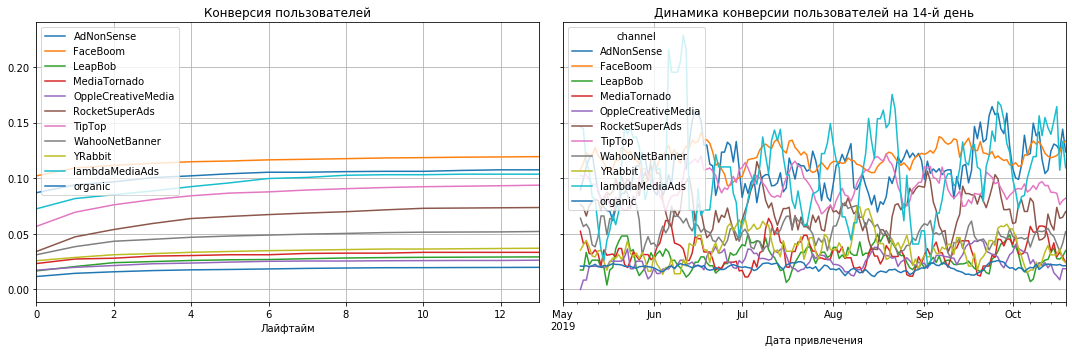

In [70]:
# смотрим конверсию с разбивкой по каналам

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

Плохо конвертируются пользователи из каналов RocketSuperAds, MediaTornado, YRabbit.

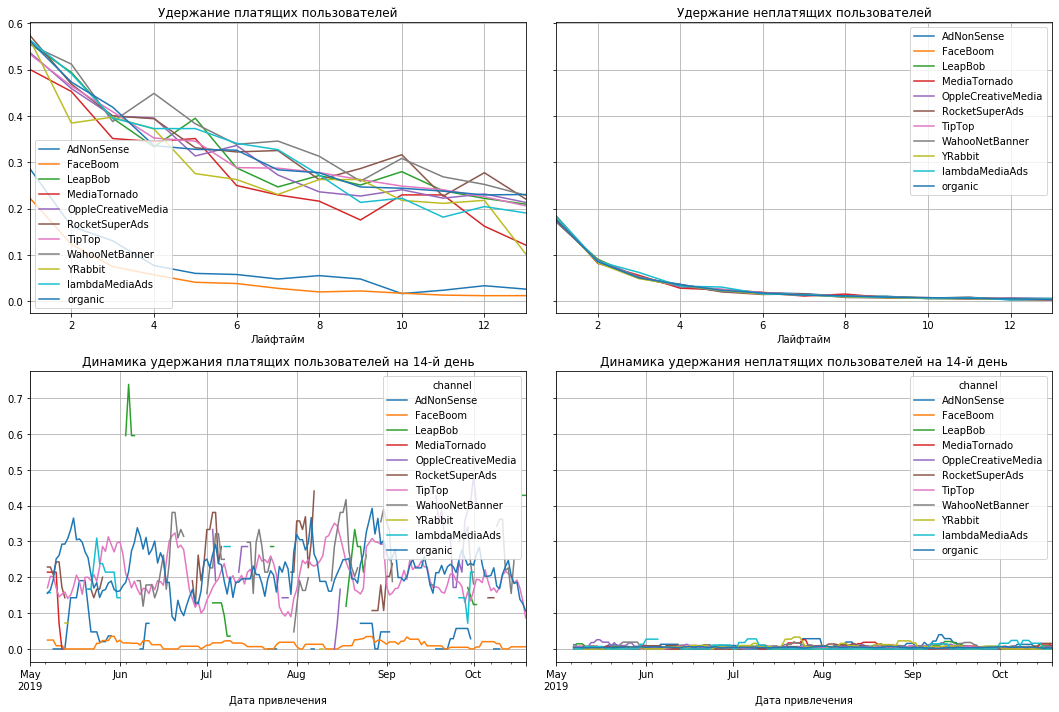

In [71]:
# смотрим удержание с разбивкой по каналам

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days) 

Видим явных аутсайдеров - плохо удерживаются пользователи из каналов FaceBoom и AdNonSense.

<a id='part_6.5'></a>
**Вывод**  
[*Назад к оглавлению*](#content)

В целом, реклама близка к окупемости, если учитывать, что на календаре 1 ноября 2019 года, а в бизнес-плане заложено, что пользователи должны окупаться не позднее чем через две недели после привлечения и то, что в анализ включены органические пользователи (не будем исключать влияние SEO). Реклама почти окупается к концу 2й недели. ROI — примерно 80%
Окупаемость могут снижать владельцы Mac и iPhone, страна - США. Не окупаются пользователи, привлеченные из каналов LeapBop, FaceBoom, TipTop.
Проблемы окупаемости могут быть вызваны ненормированным распределением средств на рекламу (в какой-то источник вложено больше средств, чем в остальные, а он не оправдал надежд), также возможно, что горизонт анализа недостаточен для того, чтобы пользователи окупились.

<a id='part_7'></a>
# Шаг 7. Общий выводы
[*Назад к оглавлению*](#content)

<a id='part_7.1'></a>
**Причины неэффективности привлечения пользователей**  
[*Назад к оглавлению*](#content)

Анализ рентабельности рекламы. Найден и визуализирован LTV и ROI.  
По графикам сделаны следующие выводы:

Реклама не окупает себя к концу 2й недели. ROI — около 80%.
CAC нестабилен. Рекламный бюджет увеличивается с течением времени.
На LTV влияет сезонный фактор, но в целом, этот показатель достаточно стабилен. Значит, дело не в ухудшении качества пользователей.
ROI пользователей постоянно падает. До июля показатель был выше уровня окупаемости, но после стал падать до 0.6.
Прошлись по всем доступным характеристикам пользователей — стране, каналу и устройству первого посещения.

Пользователи всех устройств окупались до июня, особенно для владельцев Mac и Iphone. К сентябрю (и какое-то время в августе) ROI пользователей PC на 14 день был на грани окупаемости, ROI всех остальных устройств был уже ниже уровня начиная с июня.

LTV пользователей всё так же подвержен сезонности, но устойчив. Стоимость привлечения пользователей PC самая низкая, а ROI - наоборот, выше остальных. В общем и целом, видим, что стоимость привлечения пользователей всех устройств шла вверх данный период.

Стоит обратить внимание на владельцев Mac и iPhone - стоимость их привлечения высока и растет от месяца к месяцу, а окупаемоcть страдает.  
Посчитана и визуализирована конверсия. Судя по графикам, пользователи Mac, Android и iPhone конвертируются неплохо, причём постоянно. Возможно дело в удержании. Для проверки удержания использовались функции get_retention() и plot_retention(). Не видно, чтобы пользователи каких-то определенных устройств особо плохо удерживались. Неплатящие пользователи удерживаются стабильно плохо, а из платящих лучше всего удерживаются пользователи PC, хуже - владельцы iPhone и Mac.

Графики с разбивкой по странам. Реклама окупается не везде. В США уровень окупаемости рекламы низкий. При этом стоимость привлечения пользователей из США - самая высокая. LTV всё так же подвержен сезонности, но стабилен. Лучше всего окупается Великобритании и Германия. Причем окупаемость пользователей начала падать с конца июня 2019 года. Возможно, неудачный релиз, запуск похожего продукта у конкурентов или какие-то  изменения в продукте сыграли такую роль, и сервис стал менеее привлекательным для пользователей.

Слабая конверсия у пользователей из Великобритании, Германии и Франции. Но и их доля относительно всех пользователей не такая большая.  
Видно также, что пользователи из США явно плохо удерживаются.

Заметен большой рост стоимости привлечения пользователей из рекламного канала TipTop. Кажется, слишком много средств было потрачено на эту рекламную сеть, но выхлопа от нее получилось не так много, как ожидалось. Не окупаются пользователи, привлеченные из каналов LeapBop, FaceBoom, TipTop. Хорошо показала себя рекламная сеть YRabbit в июле - ROI пользователей на 14 день был высок.

Плохо конвертируются пользователи из каналов RocketSuperAds, MediaTornado, YRabbit.

Видим явных отстающих - плохо удерживаются пользователи из каналов FaceBoom и AdNonSense

<a id='part_7.2'></a>
**Рекомендации для отдела маркетинга для повышения эффективности**  
[*Назад к оглавлению*](#content)

Направить внимание по окупаемости следует на владельцев Mac и iPhone - стоимость их привлечения высока (и растет от месяца к месяцу), а окупаемоcть страдает. Возможно, стоит сделать какое-то маркетинговое предложение именно для владельцев устройств на базе этих Mac и iPhone, чтобы они приносили продукту большую денежную ценность.

Для пользователей из США в целом уровень окупаемости рекламы низкий, а, как мы помним, у нас основная аудитория - это пользователи из США. При этом стоимость привлечения пользователей из Америки - самая высокая. Поэтому стоит также направить силы на балансировку затрат на рекламу по странам.

Лучше всего окупается Великобритании и Германия. Возможно, стоит попробовать закупить больше трафика, целясь на эту аудиторию. Явный аутсайдер по окупаемости - США. Причем окупаемость пользователей начала падать с конца июня 2019 года - стоит также разобраться, что могло послужить причиной.

Виден большой рост стоимости привлечения пользователей из рекламного канала TipTop. Кажется, слишком много средств было потрачено на эту рекламную сеть, но выхлопа от нее получилось не так много, как ожидалось. Возможно, стоит уменьшить бюджет, выделяемый на эту сеть и перенаправить его на более эффективный канал.

Не окупаются пользватели, привлеченные из каналов LeapBop, FaceBoom, TipTop. Больше всего трафика закупали у TipTop, и к октябрю число трат приближалось к 650 у.е. Число трат на FaceBoom находится в районе 300. Остальные каналы привлечения обходятся довольно дешево. Плохо удерживаются пользователи из каналов FaceBoom и AdNonSense. Можно попробовать переключить внимание на более дешевые, но прибыльные каналы.

Еще можно попробовать применить силу социальных сетей - они сейчас очень динамично развиваются и являются мощным источником привлечения новых пользователей, имеют большой охват и относительно невысокую стоимость.